<a href="https://colab.research.google.com/github/stakunlena/ich_python_for_DA_HW/blob/main/Stakun_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №8**

**1. barplot**

Импортируйте seaborn и скачате датасет fmri. Этот набор данных содержит данные функциональной магнитно-резонансного томографии (fMRI) из эксперимента, в котором испытуемые выполняли задания на восприятие языка. Отобразите первые 5 строчек датафрейма. Визуализируйте эффект типа события. Для этого постройте barplot, отображающий среднее значение signal для каждого события в момент времени timepoint=5. Не забудьте назвать график.

Первые 5 строк датафрейма:
  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


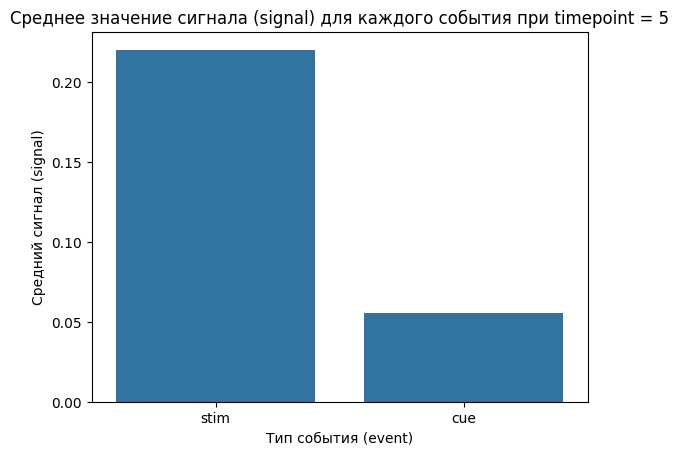

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загружаем встроенный датасет fmri
fmri = sns.load_dataset("fmri")

# 2. Отображаем первые 5 строк
print("Первые 5 строк датафрейма:")
print(fmri.head())

# 3. Фильтруем данные только для timepoint = 5
fmri_time5 = fmri[fmri["timepoint"] == 5]

# 4. Строим barplot: среднее значение signal для каждого события (event)
sns.barplot(data=fmri_time5, x="event", y="signal", errorbar=None)

# 5. Добавляем заголовок и подписи
plt.title("Среднее значение сигнала (signal) для каждого события при timepoint = 5")
plt.xlabel("Тип события (event)")
plt.ylabel("Средний сигнал (signal)")

# 6. Показываем график
plt.show()

**2. Изучение влияния области на результаты томографии.**

Отобразите с помощью pointplot средний сигнал в каждый момент времени в зависимости от области снятия показателей. Не забудьте назвать график.

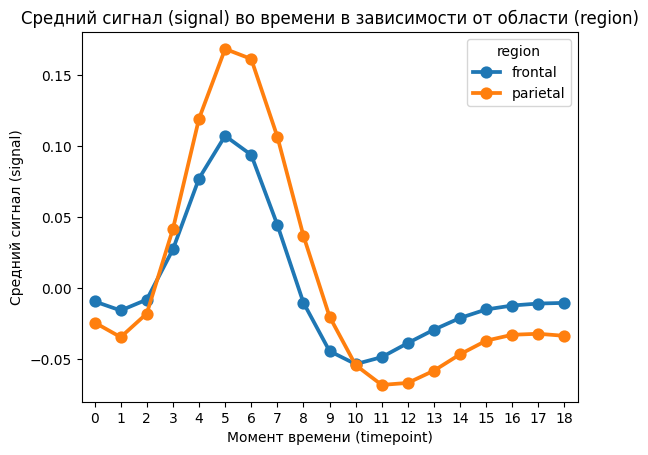

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Загружаем встроенный датасет fmri
fmri = sns.load_dataset("fmri")

# 2. Строим pointplot: средний сигнал по времени для каждой области (region)
sns.pointplot(data=fmri, x="timepoint", y="signal", hue="region", errorbar=None)

# 3. Добавляем заголовок и подписи
plt.title("Средний сигнал (signal) во времени в зависимости от области (region)")
plt.xlabel("Момент времени (timepoint)")
plt.ylabel("Средний сигнал (signal)")

# 4. Отображаем график
plt.show()

**3. Интерактивная визуализация с помощью FacetGrid.**

Используя FacetGrid, постройте отдельные lineplot для каждого субъекта, каждый график должен показывать связь между временем и сигналом.

*Задача со звёздочкой: подписать каждый график.*

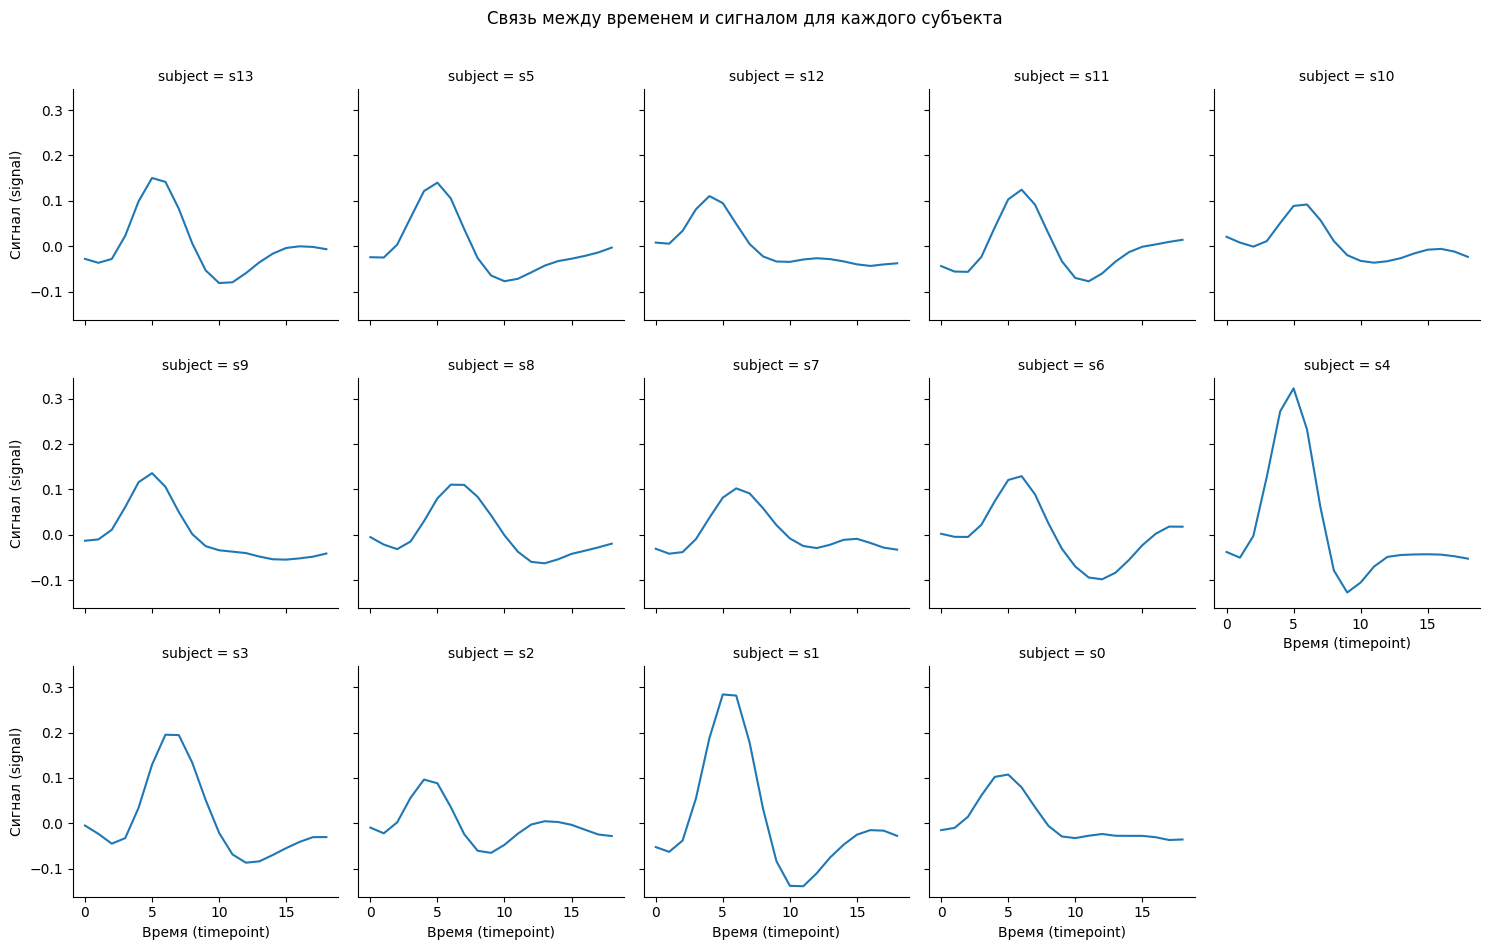

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Загружаем датасет fmri
fmri = sns.load_dataset("fmri")

# 2. Создаем FacetGrid: отдельный график для каждого субъекта
g = sns.FacetGrid(
    data=fmri,
    col="subject",      # отдельная колонка-график на каждого субъекта
                        # FacetGrid автоматически добавляет подписи над каждым графиком,
                        # если при его создании указать параметр col=...
    col_wrap=5,         # перенос по 4 графика в строке (можно менять)
    height=3,           # размер одного графика
    sharey=True,        # общий масштаб по Y, чтобы сравнивать
    sharex=True         # общий масштаб по X, чтобы сравнивать
)

# 3. Рисуем lineplot на каждом фейсе (среднее по timepoint, без интервалов)
g.map_dataframe(
    sns.lineplot,
    x="timepoint",
    y="signal",
    errorbar=None
)

# 4. Подписи осей для всех графиков
g.set_axis_labels("Время (timepoint)", "Сигнал (signal)")

# 5. Общий заголовок фигуры
g.fig.suptitle("Связь между временем и сигналом для каждого субъекта", y=1.05)

# 6. Показываем результат
plt.show()